In [ ]:
import numpy as np
from math import log, factorial
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def log_likelihood(X, lambd):
  sum = 0
  for x in X:
    sum += x*log(lambd) - lambd - log(factorial(x))
  return sum

In [ ]:
def MDD(X, w, delta, alpha):
  id = 0
  change_points = []
  i = 0
  Q = X[id:id+w]
  lambda_hat = np.mean(Q) # lambda_1
  while id + w + i < len(X):
    x_next = X[id + w + i]
    p_lambda = (1 - alpha) * lambda_hat + alpha * x_next # lambda_2
    L1 = log_likelihood(np.append(Q, [x_next]), lambda_hat)
    #print(L1)
    L2 = log_likelihood(np.append(Q, [x_next]), p_lambda)
    #print(L2)
    if L2 < L1 - delta:
      change_points.append(id+w+i)
      id = id+w+i
      i = 0
      Q = X[id:id+w]
    else:
      np.append(Q,[x_next])
      i += 1
    lambda_hat = np.mean(Q)
  return change_points

In [ ]:
from os import renames
# Mid-cap 400 Index Test Case
list_symbols = pd.read_csv('/content/sp_400_midcap.csv').loc[:,"Symbol"]
new_columns = []
for symbol in list_symbols:
  new_colume = yf.download(symbol, start = '2000-01-04', end = '2024-08-31').loc[:,'Volume']
  new_columns.append(new_colume.rename(symbol + '_vol'))

vol_dataframe = pd.concat(new_columns, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
vol_dataframe_copy = vol_dataframe.fillna(0)
avg_vol = np.average(vol_dataframe_copy, axis = 1)

In [ ]:
vol_dataframe_copy.to_csv('sp400_mid_cap_volume.csv')

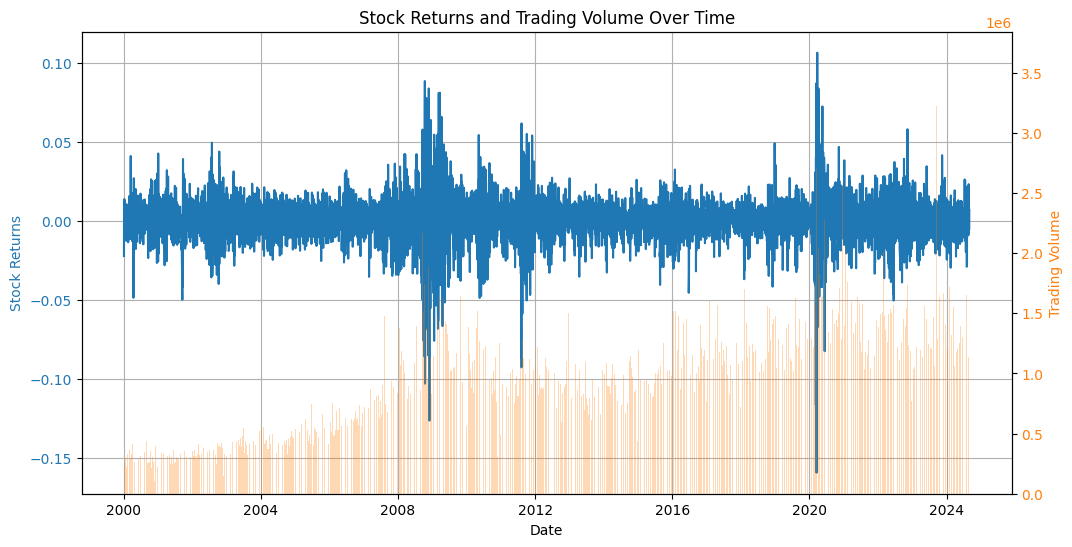

In [ ]:
# Data Visualization
df = pd.read_csv('/content/mid_cap_index.csv')
df['date'] = pd.to_datetime(df['date'])
data = pd.DataFrame({'date': df['date'].values,
                     'returns':df['ret'].values,
                     'volume': avg_vol})

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the stock returns
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Returns', color='tab:blue')
ax1.plot(data['date'], data['returns'], color='tab:blue', label='Stock Returns')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.set_ylabel('Trading Volume', color='tab:orange')
ax2.bar(data['date'], data['volume'], color='tab:orange', alpha=0.3, label='Trading Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adding a title and grid
plt.title('Stock Returns and Trading Volume Over Time')
ax1.grid()

# Show the plot
plt.show()


In [ ]:
avg = (avg_vol/10000).astype(int)
#avg
index = MDD(avg, w=22, delta=100, alpha=0.5)

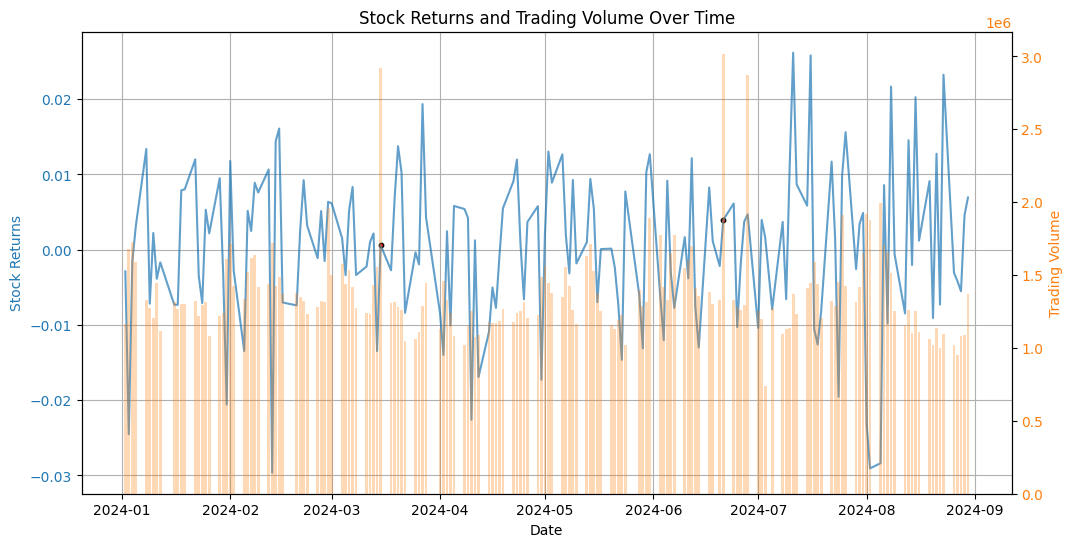

In [ ]:
# Data Visualization
df = pd.read_csv('/content/mid_cap_index.csv')
df['date'] = pd.to_datetime(df['date'])
data = pd.DataFrame({'date': df['date'].values,
                     'returns':df['ret'].values,
                     'volume': avg_vol})

data_filtered = data[(data['date'] >= '2024-01-01') & (data['date'] <= '2024-12-31')]
total_dates = data.iloc[index]['date']
highlight_dates = total_dates[(total_dates>= '2024-01-01') & (total_dates <= '2024-12-31')]
highlight_returns = df.iloc[highlight_dates.index]['ret']
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the stock returns
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Returns', color='tab:blue')
ax1.plot(data_filtered['date'], data_filtered['returns'], color='tab:blue',alpha=0.7, label='Stock Returns')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.set_ylabel('Trading Volume', color='tab:orange')
ax2.bar(data_filtered['date'], data_filtered['volume'], color='tab:orange', alpha=0.3, label='Trading Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax1.scatter(highlight_dates, highlight_returns,
            color='red', s=10, label='Highlighted Returns', edgecolor='black')
# Adding a title and grid
plt.title('Stock Returns and Trading Volume Over Time')
ax1.grid()

# Show the plot
plt.show()

# Generate Outliers For Testing Purpose

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1000)
actual_ret = pd.read_csv('/content/mid_cap_index.csv')

In [33]:
num_outliers = 20
outlier_indices = np.random.choice(np.arange(actual_ret.shape[0]), num_outliers, replace=False)

In [55]:
mu = np.mean(actual_ret['ret'])
sigma = np.std(actual_ret['ret'])

In [50]:
mu

0.0003885207840810599

In [51]:
sigma

0.014532066894739692

In [59]:
# Compute the 5% critical values (beyond 95th percentile or below 5th percentile)
lower_bound = mu - 1.645 * sigma
upper_bound = mu + 1.645 * sigma

# Generate outliers outside the 5% critical range
outliers = np.concatenate([
    np.random.normal(loc=upper_bound, scale=0.5, size=num_outliers // 2),
    np.random.normal(loc=lower_bound, scale=0.5, size=num_outliers // 2)
])

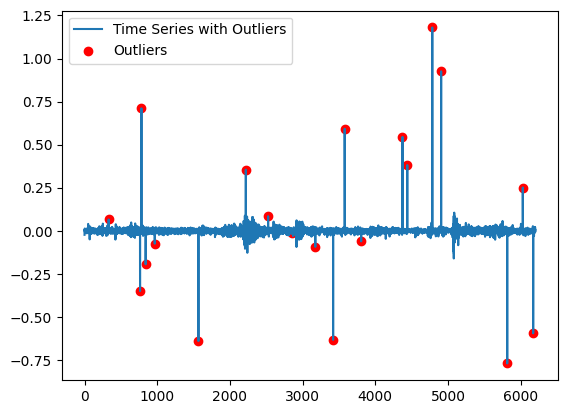

Lower bound: -0.023516729257765732, Upper bound: 0.024293770825927853
Generated outliers: [ 0.25211385  1.18039027 -0.63138092  0.92615357 -0.76842777 -0.09208362
 -0.01162555  0.38248331 -0.34824327 -0.63829188  0.06689544  0.08577385
  0.35560559  0.71141188  0.59291593 -0.07363391  0.54569086 -0.06012382
 -0.19312995 -0.59337886]


In [61]:
ts_with_outliers = actual_ret.copy()
for i in range(len(outliers)):
  ts_with_outliers.iloc[outlier_indices[i], 1] = outliers[i]
#ts_with_outliers.set_index('date', drop = True)
# Plot the time series with outliers
plt.plot(ts_with_outliers['ret'], label="Time Series with Outliers")
plt.scatter(outlier_indices, ts_with_outliers.iloc[outlier_indices, 1], color="red", label="Outliers")
plt.legend()
plt.show()

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Generated outliers: {outliers}")

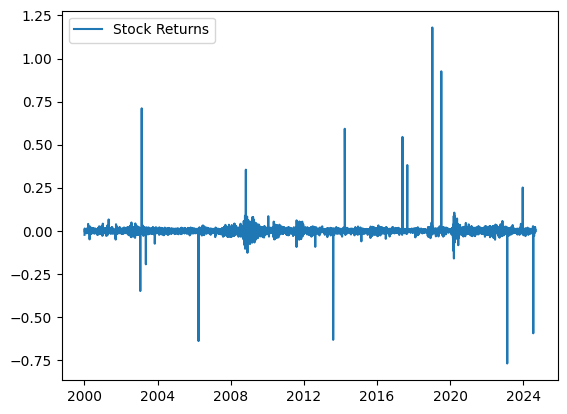

In [62]:
ts_with_outliers['date'] = pd.to_datetime(ts_with_outliers['date'])
plt.plot(ts_with_outliers['date'], ts_with_outliers['ret'], color='tab:blue', label='Stock Returns')
#plt.scatter(outlier_indices, ts_with_outliers.iloc[outlier_indices, 1], color="red", label="Outliers")
plt.legend()
plt.show()

In [63]:
ts_with_outliers.to_csv("index_with_outliers.csv")